Observations:
1. Since the sales is continuos data, classification algorithm is not applicable
2. The pairplot showed somewhat linear relationship between dependent and independent variables
3. Simple Linear regression model is built with TV and observed that R2 is 0.612 and MSE is 10.512. P-value for TV is 0 and so this variable can be included in modeling. 
4. Since there is room to improve R2 and reduce MSE, the model is modified to include Radio in modeling. Modified R-Squared : 0.8971, Modified MSE: 2.7845, P-value for Radio= 0.
5. The model is again modified by including Newspaper and have observed that R2 and MSE have not changed. Pvalue is 0.86 for newspaper and hence this independent variable can be excluded from modeling.
6. Performed Model validation and achieved Linear regression accuracy: 0.9131, mean = 0.8665, std = 0.071964. Below are the accuracies for 5 fold cross  validation[0.84764423 0.89161798 0.73574318 0.92503378 0.93271534]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
Regression Params: Intercept    7.032594
TV           0.047537
dtype: float64
MSE: 10.512652915656757
r_squared 0.8971942610828956
mse_new:  2.784569900338091
r_sq_final:  0.8972106381789522
mse_final: 2.784126314510936


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.58e-96
Time:                        16:03:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

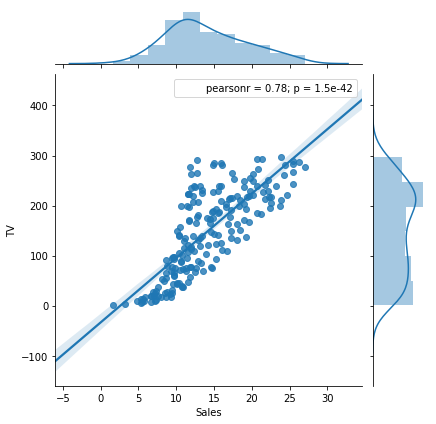

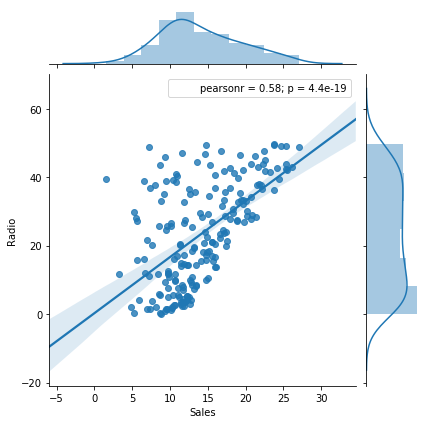

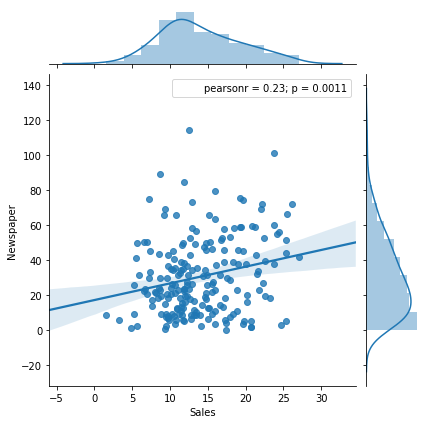

In [13]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

Adv = pd.read_csv(r'C:\Users\Sushma Myneni\Downloads\Practical-Data-Science-master\Datasets\Advertising\Advertising.csv')

#-------------------------------------------------------------------------------------------
# EDA
Adv.info()  # No Nulls In the dataset
Adv.describe() # Check Stats

# Plot
#sns.pairplot(Adv) # OBSERVED SOMEWHAT LINEAR RELATIONSHIP FOR TV AND RADIO

# Plotting A Regression
sns.jointplot(x="Sales", y="TV", data=Adv,kind="reg")
sns.jointplot(x="Sales",y="Radio",data=Adv,kind="reg")  
sns.jointplot(x="Sales",y="Newspaper",data=Adv,kind="reg")

#====================================================================================
# Building Model
lm = sm.ols(formula='Sales ~ TV', data = Adv).fit()

# get Prediction From trained model
y_hat = lm.predict(Adv['TV'])
# Check the parameters of the linear regression, intercept and coefficient
print('Regression Params:',lm.params) #Regression Params: Intercept - 7.032594, Coeff TV - 0.047537
r_squared = lm.rsquared  #R2=0.612
mse = mean_squared_error(Adv['Sales'].values, y_hat) # MSE = 10.512, P-value for TV = 0
print('MSE:', mse)
lm.summary()

#====================================================================================
# Modify the model To Improve R2 By Including Radio
lm1 = sm.ols(formula='Sales ~ TV + Radio', data = Adv).fit()

# Modified Prediction
y_hat = lm1.predict(Adv[['TV', 'Radio']])
r_squared = lm1.rsquared
print('r_squared', r_squared)   # Modified R-Squared : 0.8971942610828956
mse = mean_squared_error(y_hat, Adv['Sales']) # Modified MSE: 2.784569900338091, P-value for Radio= 0
print('mse_new: ', mse)

lm1.summary()

#====================================================================================
# Modify the model To Improve R2 By Including Newspaper
lm2 = sm.ols(formula='Sales ~ TV + Radio + Newspaper', data = Adv).fit()

# Modified Prediction
y_hat_final = lm2.predict(Adv[['TV', 'Radio', 'Newspaper']])
r_sq_final = lm2.rsquared
print('r_sq_final: ', r_sq_final) # Modified R-Squared : 0.8971942610828956
mse_final = mean_squared_error(y_hat_final,Adv['Sales']) # Modified MSE: 2.784569900338091, P-value for Newspaper= 0.86
print('mse_final:', mse_final)
lm2.summary()

In [14]:
# model validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

x= Adv.drop(['Sales'],1)
y=Adv['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = LinearRegression()
classifier.fit(x_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
print('Linear regression accuracy: ', classifier.score(x_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))


Linear regression accuracy:  0.9131445634871469
[0.84764423 0.89161798 0.73574318 0.92503378 0.93271534]
mean = 0.8665509044470768, std = 0.07196452047531245
